As I searched through the many datasets provided by WPRDC, I came across 311 data. I found this to be the most interesting to me as it is mobile requests made by people in the neighborhoods of Pittsburgh. Not only was I interested in finding out what type of 311 calls were made but what neighborhoods had the most and least. I specifically looked at the neighborhoods and the amount of requests made. Overall, this helped me find the safest neighborhood in Pittsburgh in terms of quieteness, since a neighborhood with a low amount of 311 requests is a quieter neighborhood than one with more requests. 

Import

In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

# 311 Dataset

311 service requests in Pittsburgh. Requests are collected from the following: phone calls, tweets, emails, a form on the City website, and through the 311 mobile application

In [9]:
# importing data
pgh_311_data = pd.read_csv('https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4', index_col = "REQUEST_ID")
pgh_311_data

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585669.0,2021-12-07T16:54:00,City Facility,Call Center,0,DPW - Facilities,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.035896,40.479149,EXACT
585670.0,2021-12-07T16:57:00,Question,Call Center,1,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUT_OF_BOUNDS
585671.0,2021-12-07T17:02:00,Weeds/Debris,Call Center,0,"Permits, Licenses and Inspections",Swisshelm Park,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-19,-79.898695,40.420577,EXACT


# Neighborhood with the most 311 call requests

In [14]:
pgh_311_data['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)

Brookline               22791
Carrick                 21773
Squirrel Hill South     18925
South Side Slopes       18522
South Side Flats        16852
                        ...  
East Carnegie             533
Northview Heights         527
Glen Hazel                370
Arlington Heights         113
Mount Oliver Borough       61
Name: NEIGHBORHOOD, Length: 91, dtype: int64

Since we want the most up to date information on the status of the 311 requests where 0 = new, according to the Data Dictionary, we will filter out the dataset

In [15]:
filtered_pgh_311_data = pgh_311_data[pgh_311_data.STATUS == 0]
filtered_pgh_311_data

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
170189.0,2017-07-14T15:37:00,Mayor's Office,Call Center,0,311,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,2-23,-79.948119,40.455066,APPROXIMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585668.0,2021-12-07T16:43:00,Misconduct/City Employee,Call Center,0,OMI,Brookline,4.0,32.0,4.200332e+10,5.0,32.0,6.0,4-25,-80.002462,40.398879,APPROXIMATE
585669.0,2021-12-07T16:54:00,City Facility,Call Center,0,DPW - Facilities,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.035896,40.479149,EXACT
585671.0,2021-12-07T17:02:00,Weeds/Debris,Call Center,0,"Permits, Licenses and Inspections",Swisshelm Park,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-19,-79.898695,40.420577,EXACT


Then we will find the neighborhoods with the most requests as of recently

In [16]:
requests = filtered_pgh_311_data['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)
requests

Carrick                      1290
Brookline                    1205
Squirrel Hill South           982
Central Business District     859
Mount Washington              833
                             ... 
Ridgemont                      26
Northview Heights              25
Chartiers City                 17
Mount Oliver Borough            3
Arlington Heights               2
Name: NEIGHBORHOOD, Length: 91, dtype: int64

# Plot all Neighborhoods and their Request Count

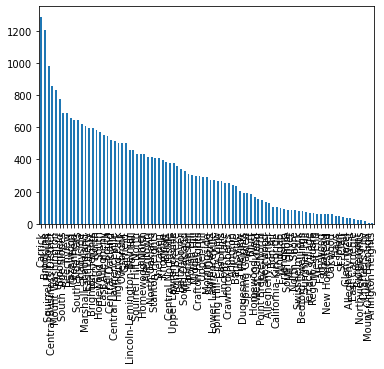

In [27]:
requests.plot.bar()

This graph is disorganized so now we will filter it out by looking at the greatest and least ten neighborhoods regarding 311 request counts

# The 10 neighborhoods with the greatest number of calls

Text(0, 0.5, 'Number of Requests')

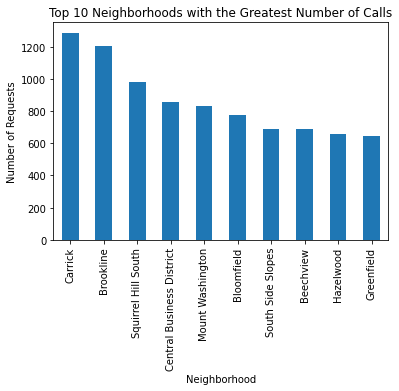

In [21]:
requests.head(10).plot.bar()
plt.title("Top 10 Neighborhoods with the Greatest Number of Calls")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Requests")

# The 10 neighborhoods with the least number of calls

Text(0, 0.5, 'Number of Requests')

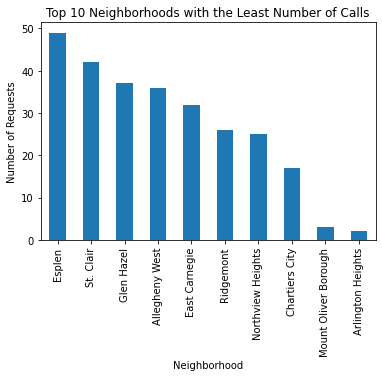

In [22]:
requests.tail(10).plot.bar()
plt.title("Top 10 Neighborhoods with the Least Number of Calls")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Requests")

# Comparison

Comparing the greatest and least 10 neighborhoods

Text(0, 0.5, 'Number of Requests')

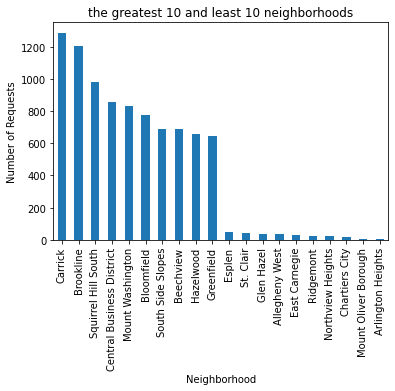

In [25]:
greatestandleast = requests.head(10).append(requests.tail(10))
greatestandleast.plot.bar()
plt.title("the greatest 10 and least 10 neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Requests")

In [26]:
query_mask = filtered_pgh_311_data['NEIGHBORHOOD'] == "Arlington Heights"
arlingtonheights = filtered_pgh_311_data[query_mask]
arlingtonheights["REQUEST_TYPE"].count()

2

This query mask is to emphasize that Arlington Heights had only two requests, the least amount out of all the neighborhoods in the dataset 

# Conclusion

As shown in the plot above, Arlington Heights has the least amount of 311 calls throughout the Pittsburgh neighborhoods. This is considered the "best" neighborhood since "best" is in terms of safety. Since a low amount of 311 calls/reports = quiet and quiet = safe. Since our group decided to do a ranking system 1-5 to find the safest neighborhood overall, with 5 the being safest, my rankings are as follows:

5: Arlington Heights
4: Mount Oliver Borough
3: Chartiers City
2: Northview Heights
1: Ridgemont